# Binance API Exploration

This notebook is dedicated to exploring the Binance API and its functionalities. It allows users to interact with the API and analyze the data it provides. Going to use binance for long-term data quality. 

In [5]:
import sys
import os
import pandas as pd
from datetime import datetime

# Add project root to Python path
project_root = os.path.abspath('..')  # Go up one level from notebooks/
sys.path.insert(0, project_root)

print(f"Added to Python path: {project_root}")
print(f"Current working directory: {os.getcwd()}")

from src.data_providers.factory import setup_providers, demo_usage
from datetime import datetime

# Setup providers
manager = setup_providers()

# Test connections
print("Connection Status:")
for provider, status in manager.test_all_connections().items():
    print(f"  {provider}: {'✅ Connected' if status else '❌ Failed'}")


# Method 1: Quick demo
manager = demo_usage()

# Method 2: Manual setup and testing
print("\n" + "="*50)
print("MANUAL TESTING")
print("="*50)

manager = setup_providers()

# Test each provider individually
providers_to_test = ['dune', 'hyperliquid', 'binance']

for provider_name in providers_to_test:
    print(f"\n🔍 Testing {provider_name.upper()}:")
    
    provider = manager.get_provider(provider_name)
    if provider:
        # Test connection
        connected = provider.validate_connection()
        print(f"   Connection: {'✅ OK' if connected else '❌ Failed'}")
        
        # Test data fetching
        if connected:
            try:
                if provider_name == 'binance':
                    data = provider.get_market_data('BTCUSDT', interval='1d', limit=5)
                    print(f"   Sample data: {len(data)} rows")
                    if not data.empty:
                        print(f"   Columns: {data.columns.tolist()}")
                        
                elif provider_name == 'hyperliquid':
                    symbols = provider.get_available_symbols()
                    print(f"   Available symbols: {len(symbols)} found")
                    
                elif provider_name == 'dune':
                    # Test basic query if API key available
                    print(f"   Dune provider ready (requires API key)")
                    
            except Exception as e:
                print(f"   ❌ Data test failed: {e}")
    else:
        print(f"   ❌ Provider not initialized")

print(f"\n✅ Factory integration test complete!")

2025-09-11 18:20:06,311 INFO DuneProvider Fetching fresh data for query 5745512


Added to Python path: /Users/Max/Code/Github/ML_driven_on-chain_metrics
Current working directory: /Users/Max/Code/Github/ML_driven_on-chain_metrics/notebooks
✅ Dune provider initialized
✅ Hyperliquid provider initialized
✅ Binance provider initialized
Connection Status:


2025-09-11 18:20:07,517 INFO DuneProvider Fetching fresh data for query 5745512


  dune: ✅ Connected
  hyperliquid: ✅ Connected
  binance: ✅ Connected
🚀 Setting up data providers...
✅ Dune provider initialized
✅ Hyperliquid provider initialized
✅ Binance provider initialized
📊 Active providers: ['dune', 'hyperliquid', 'binance']


2025-09-11 18:20:08,584 INFO DuneProvider Using cached data for query 5745512
2025-09-11 18:20:08,585 INFO HyperliquidProvider Using lookback: 24 hours
2025-09-11 18:20:08,590 INFO HyperliquidProvider Fetching ETH market data: 1h interval, 24.0h period


   Dune: ✅ Connected
   Hyperliquid: ✅ Connected
   Binance: ✅ Connected

📈 Fetching Dune data...
   Got 4591 rows of bot volume data

🔥 Fetching Hyperliquid data...


2025-09-11 18:20:08,962 INFO HyperliquidProvider Retrieved 25 candles for ETH (1h)
2025-09-11 18:20:08,970 INFO DuneProvider Fetching fresh data for query 5745512


   Got 25 rows of ETH market data

💰 Fetching Binance data...
   Error: BinanceProvider.get_market_data() takes 2 positional arguments but 3 were given

MANUAL TESTING
✅ Dune provider initialized
✅ Hyperliquid provider initialized
✅ Binance provider initialized

🔍 Testing DUNE:
   Connection: ✅ OK
   Dune provider ready (requires API key)

🔍 Testing HYPERLIQUID:
   Connection: ✅ OK
   Available symbols: 206 found

🔍 Testing BINANCE:


2025-09-11 18:20:10,595 INFO BinanceProvider Fetching spot data for BTCUSDT (1d)


   Connection: ✅ OK


2025-09-11 18:20:10,856 INFO BinanceProvider Retrieved 5 candles for BTCUSDT


   Sample data: 5 rows
   Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume', 'symbol', 'interval', 'market_type', 'trades_count']

✅ Factory integration test complete!


2025-09-11 18:28:47,072 INFO BinanceProvider Fetching spot data for BTCUSDT (1d)
2025-09-11 18:28:48,067 INFO BinanceProvider Retrieved 1000 candles for BTCUSDT


Retrieved 1000 days of BTC data
Date range: 2022-12-17 00:00:00 to 2025-09-11 00:00:00


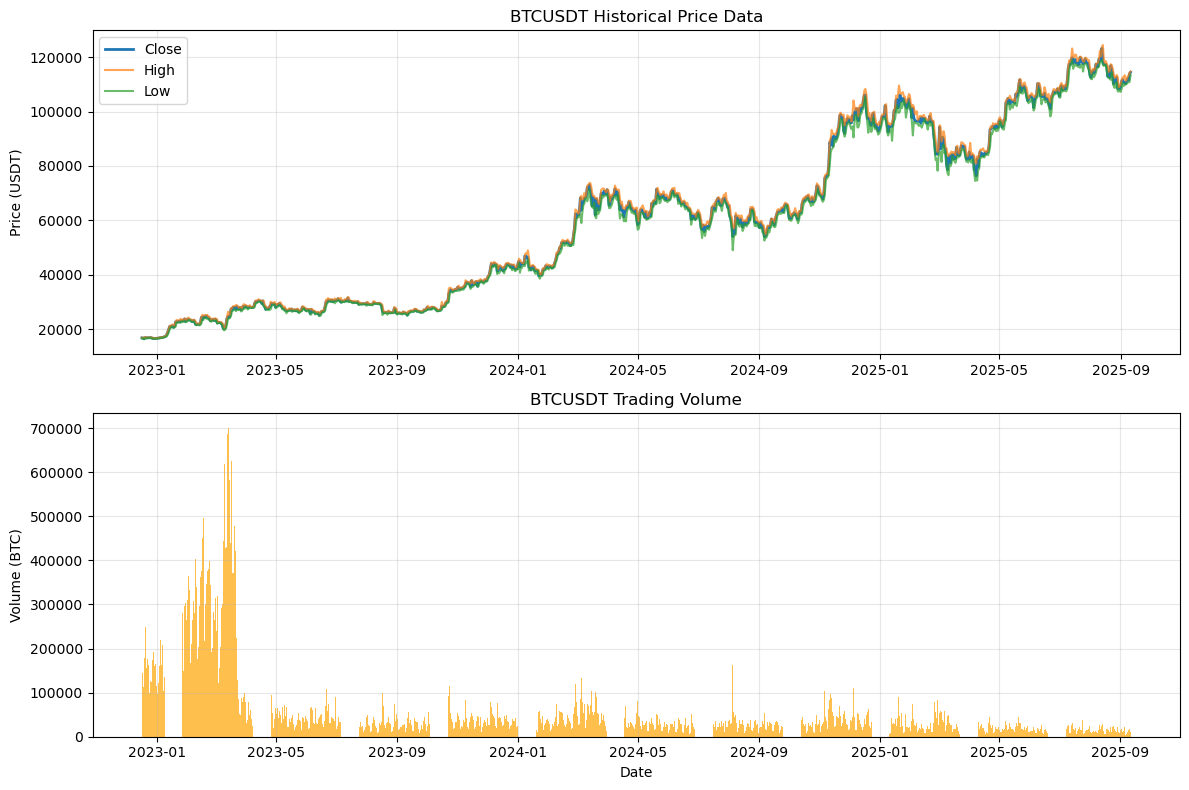


Price Summary Statistics:
                open           high            low          close  \
count    1000.000000    1000.000000    1000.000000    1000.000000   
mean    60574.896830   61683.389000   59487.936960   60672.761310   
std     30894.975581   31369.668496   30377.996846   30910.628066   
min     16438.880000   16628.000000   16256.300000   16438.880000   
25%     29232.965000   29657.635000   28988.570000   29269.120000   
50%     60815.455000   62379.890000   59701.515000   60831.990000   
75%     88126.000000   91532.407500   86070.240000   88656.092500   
max    123306.440000  124474.000000  118920.920000  123306.430000   

              volume  
count    1000.000000  
mean    57359.431284  
std     87738.193524  
min      3282.173520  
25%     19301.918762  
50%     30003.635190  
75%     48725.238157  
max    699360.934230  


In [ ]:
# Get all historical data for BTCUSDT (1d interval)
btc_historical = provider.get_market_data('BTCUSDT', interval='1d', limit=1000)

print(f"Retrieved {len(btc_historical)} days of BTC data")
print(f"Date range: {btc_historical['datetime'].min()} to {btc_historical['datetime'].max()}")

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot OHLC data
plt.subplot(2, 1, 1)
plt.plot(btc_historical['datetime'], btc_historical['close'], label='Close', linewidth=2)
plt.plot(btc_historical['datetime'], btc_historical['high'], label='High', alpha=0.7)
plt.plot(btc_historical['datetime'], btc_historical['low'], label='Low', alpha=0.7)
plt.title('BTCUSDT Historical Price Data')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot volume
plt.subplot(2, 1, 2)
plt.bar(btc_historical['datetime'], btc_historical['volume'], alpha=0.7, color='orange')
plt.title('BTCUSDT Trading Volume')
plt.ylabel('Volume (BTC)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nPrice Summary Statistics:")
print(btc_historical[['open', 'high', 'low', 'close', 'volume']].describe())